Считаем общую выручку магазина

In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:

def calculate_total_revenue(file_path):
    total_revenue = 0

    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')  # Используем разделитель ';'
        next(reader)  # Пропускаем заголовок

        for row in reader:
            total_revenue += float(row[-1])  # Суммируем значения последнего столбца

    return total_revenue

file_path = r"C:\Users\Вероника\OneDrive\Рабочий стол\project_kr\курсовая.csv"
total_revenue = calculate_total_revenue(file_path)

print(f"Общая выручка магазина: {total_revenue}")


Общая выручка магазина: 76600.0


Ниже реализован класс хеш-таблицы, для последующих заданий. Коллизии устраняются методом цепочек

In [3]:
# Создаем класс узла списка
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10 # начальная емкость таблицы
        self.size = 0 # количество элементов в таблице
        self.buckets = [None] * self.capacity # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def put(self, key, value):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2 # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

Находим товар, который был продан большее количество раз. (При помощи хеш таблицы)

In [4]:

def find_best_selling_product(file_path):
    product_sales = HashTable()

    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)

        for row in reader:
            product_name = row[2]
            quantity_sold = int(row[4])

            if product_sales.get(product_name) is not None:
                product_sales.put(product_name, quantity_sold + product_sales.get(product_name))
            else:
                product_sales.put(product_name, quantity_sold)

    best_product = None
    max_sales = 0
    for key in product_sales.buckets:
        node = key
        while node:
            if node.value > max_sales:
                max_sales = node.value
                best_product = node.key
            node = node.next

    return best_product, max_sales

file_path = r"C:\Users\Вероника\OneDrive\Рабочий стол\project_kr\курсовая.csv"
best_product, sales_count = find_best_selling_product(file_path)

print("Товар, который был продан наибольшее количество раз:", best_product)
print("Количество продаж:", sales_count)


Товар, который был продан наибольшее количество раз: Джинсы
Количество продаж: 6


Находим товар, который принес наибольшую выручку, при помощи хеш-таблицы и сортировки пузырьком

In [5]:

def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        for j in range(n - i - 1):
            if arr[j][1] < arr[j + 1][1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def find_best_revenue_product(file_path):
    products_revenue = HashTable()

    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader) 

        for row in reader:
            product_name = row[2]
            revenue = float(row[-1])

            if products_revenue.get(product_name) is not None:
                products_revenue.put(product_name, products_revenue.get(product_name) + revenue)
            else:
                products_revenue.put(product_name, revenue)

    sorted_products = []
    for bucket in products_revenue.buckets:
        node = bucket
        while node:
            sorted_products.append((node.key, node.value))
            node = node.next

    bubble_sort(sorted_products)

    best_product = sorted_products[0][0]
    best_revenue = sorted_products[0][1]

    return best_product, best_revenue

file_path = r"C:\Users\Вероника\OneDrive\Рабочий стол\project_kr\курсовая.csv"
best_product, best_revenue = find_best_revenue_product(file_path)

print("Товар, который принес наибольшую выручку:", best_product, "Выручка:", best_revenue)


Товар, который принес наибольшую выручку: Джинсы Выручка: 25200.0


Графический отчет, в котором указана информация об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в выручке магазина

76600.0


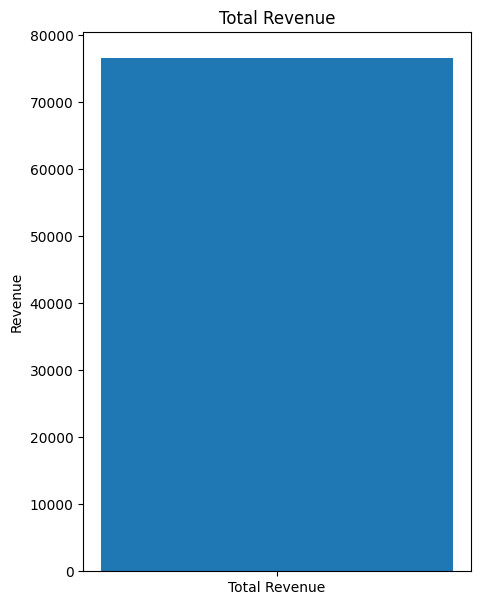

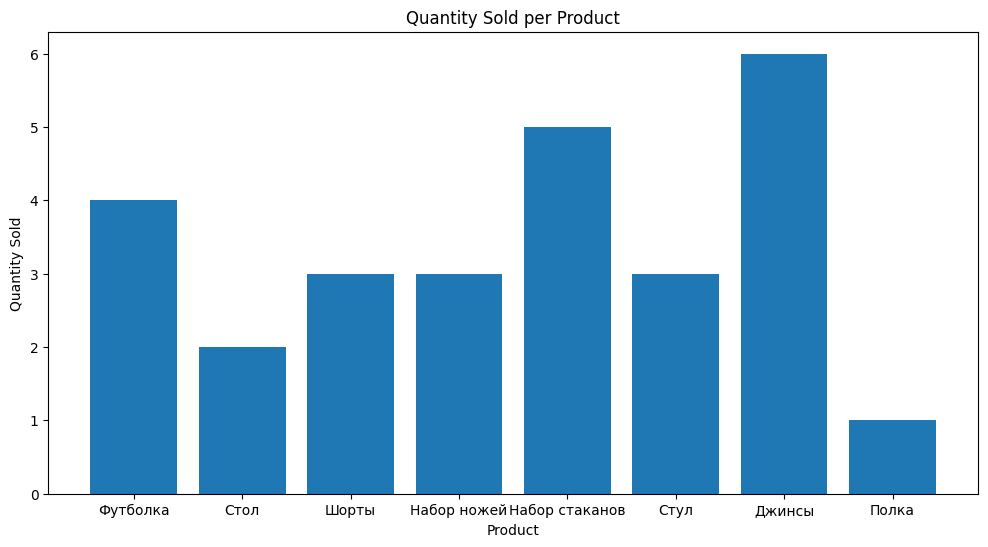

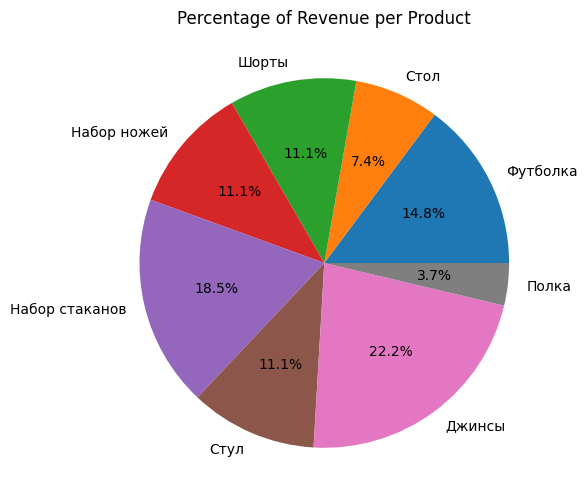

In [6]:
def generate_report(file_path):
    product_sales = {}
    total_revenue = 0

    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)  # Пропускаем заголовок

        for row in reader:
            product_name = row[2]  # Название товара
            quantity_sold = int(row[4])  # Количество продаж
            total_revenue += float(row[-1])


            if product_name in product_sales:
                product_sales[product_name] += quantity_sold
            else:
                product_sales[product_name] = quantity_sold
    print(total_revenue)

    # Создаем списки для данных графика
    labels = list(product_sales.keys())
    quantities = list(product_sales.values())
    percentages = [(quantity / sum(quantities)) * 100 for quantity in quantities]

    # График общей выручки
    plt.figure(figsize=(5, 7))
    plt.bar("Total Revenue", total_revenue)
    plt.ylabel("Revenue")
    plt.title("Total Revenue")

    # График количества проданных единиц каждого товара
    plt.figure(figsize=(12, 6))
    plt.bar(labels, quantities)
    plt.xlabel("Product")
    plt.ylabel("Quantity Sold")
    plt.title("Quantity Sold per Product")

    # График доли каждого товара в выручке магазина
    plt.figure(figsize=(12, 6))
    plt.pie(percentages, labels=labels, autopct='%1.1f%%')
    plt.title("Percentage of Revenue per Product")

    # Отображаем графики
    plt.show()

file_path = r"C:\Users\Вероника\OneDrive\Рабочий стол\project_kr\курсовая.csv"
generate_report(file_path)